# Creating a data analysis project with Uber data  to exploratory analysis and visualization. and Building a predictive model for Uber data involves using mean_squared_error, mean_absolute_error, r2_score, SVR, logistic regression

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load data
uber_data=pd.read_csv("UberDataset.csv")

In [3]:
#top 5 data
uber_data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
uber_data.shape

(1156, 7)

In [5]:
#Check for missing values
uber_data.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [6]:
#Calculate basic statistics to understand the data distribution.
uber_data.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [7]:
uber_data.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [8]:
uber_data.PURPOSE.value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

In [9]:
uber_data[uber_data.duplicated()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9,Meeting


In [10]:
uber_data.drop_duplicates(inplace=True)

In [11]:
uber_data.dropna(inplace = True)

In [12]:
uber_data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


In [13]:
uber_data.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [14]:
uber_data.shape

(652, 7)

In [15]:
uber_data['CATEGORY'].nunique()

2

In [16]:
uber_data['PURPOSE'].nunique()

10

# Use plots to explore relationships and distributions within the data.

## Bar plot

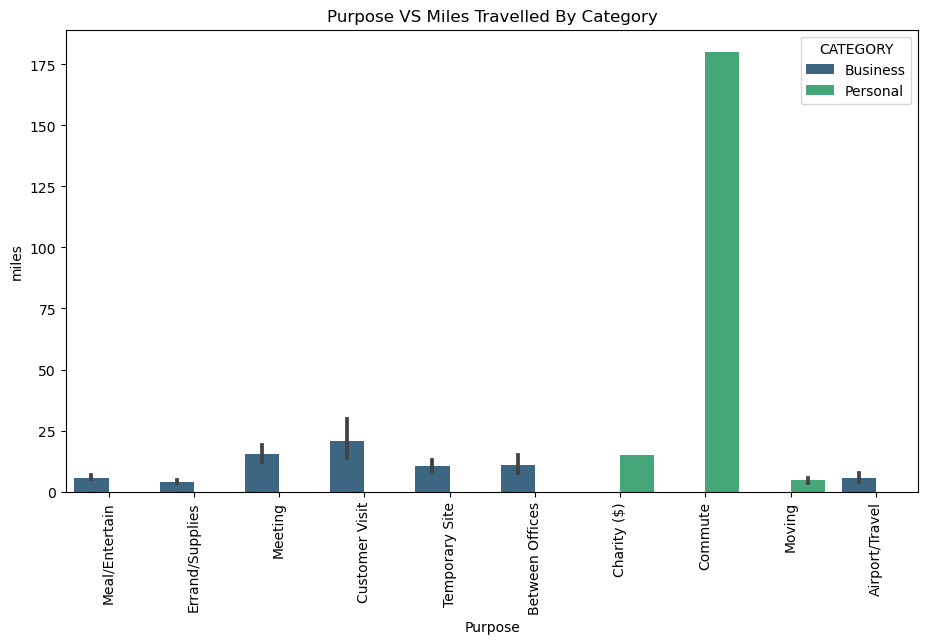

In [17]:
plt.figure(figsize=(11,6))
sns.barplot(x=uber_data["PURPOSE"], y=uber_data["MILES"], hue=uber_data["CATEGORY"], palette = 'viridis')
plt.xlabel('Purpose')
plt.ylabel('miles')
plt.title('Purpose VS Miles Travelled By Category')
plt.xticks(rotation=90)
plt.show()

uber use for personal reason as compared to business. for personal reason uber travel more miles

## Count plot

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

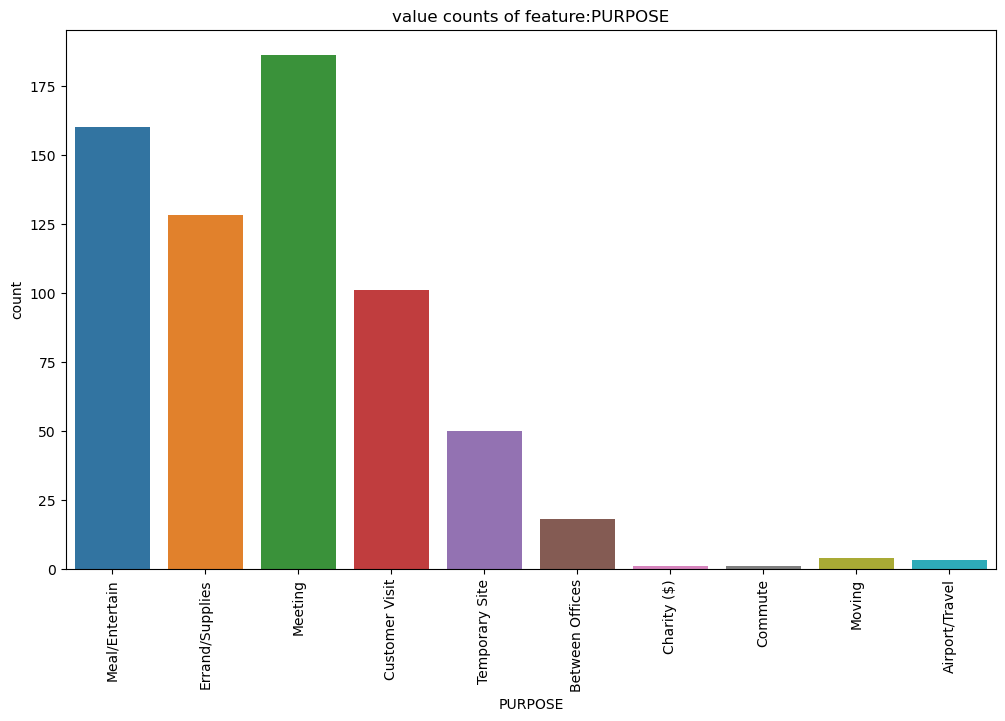

In [18]:
plt.figure(figsize=(12,7))
sns.countplot(x=uber_data["PURPOSE"])
plt.title("value counts of feature:PURPOSE")
plt.xticks(rotation=90)


(array([0, 1]), [Text(0, 0, 'Business'), Text(1, 0, 'Personal')])

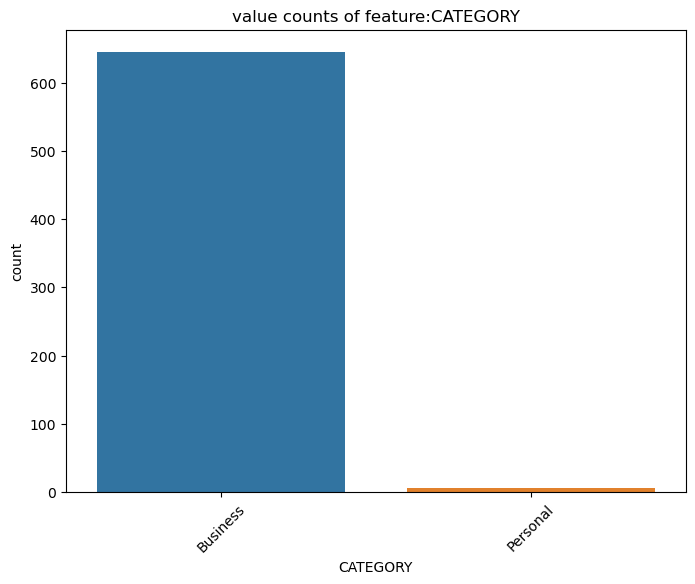

In [19]:
plt.figure(figsize=(8,6))
sns.countplot(x=uber_data["CATEGORY"])
plt.title("value counts of feature:CATEGORY")
plt.xticks(rotation=45)

## Feature Engineering

In [20]:
uber_data.rename(columns={
    'START_DATE': 'start_date',
    'END_DATE': 'end_date',
    'CATEGORY': 'category',
    'START' : 'start',
    'STOP' : 'stop',
    'MILES' : 'miles',
    'PURPOSE' : 'purpose'
}, inplace=True)

In [21]:
#The type is str!. Let's convert it to datetime format for easy indexing
uber_data['start_date'] = pd.to_datetime(uber_data['start_date'])
uber_data['end_date'] = pd.to_datetime(uber_data['end_date'])

In [22]:
uber_data['day_name'] = uber_data['start_date'].dt.day_name()

In [23]:
time_periods = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']

uber_data['time_label'] = pd.cut(uber_data['start_date'].dt.hour, bins=time_periods, labels=labels, right=False)

uber_data["month"] = uber_data['start_date'].dt.month_name()

uber_data['duration'] = (uber_data['end_date'] - uber_data['start_date']).astype('timedelta64[m]')

In [24]:
uber_data.head()

,start_date,end_date,category,start,stop,miles,purpose,day_name,time_label,month,duration
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,Evening,January,6.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday,Evening,January,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday,Afternoon,January,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday,Afternoon,January,67.0
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,Wednesday,Afternoon,January,4.0


In [25]:
uber_data["month"]

0        January
2        January
3        January
4        January
5        January
          ...   
1150    December
1151    December
1152    December
1153    December
1154    December
Name: month, Length: 652, dtype: object

In [26]:
uber_data.shape

(652, 11)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Friday'),
  Text(1, 0, 'Saturday'),
  Text(2, 0, 'Tuesday'),
  Text(3, 0, 'Wednesday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Sunday'),
  Text(6, 0, 'Monday')])

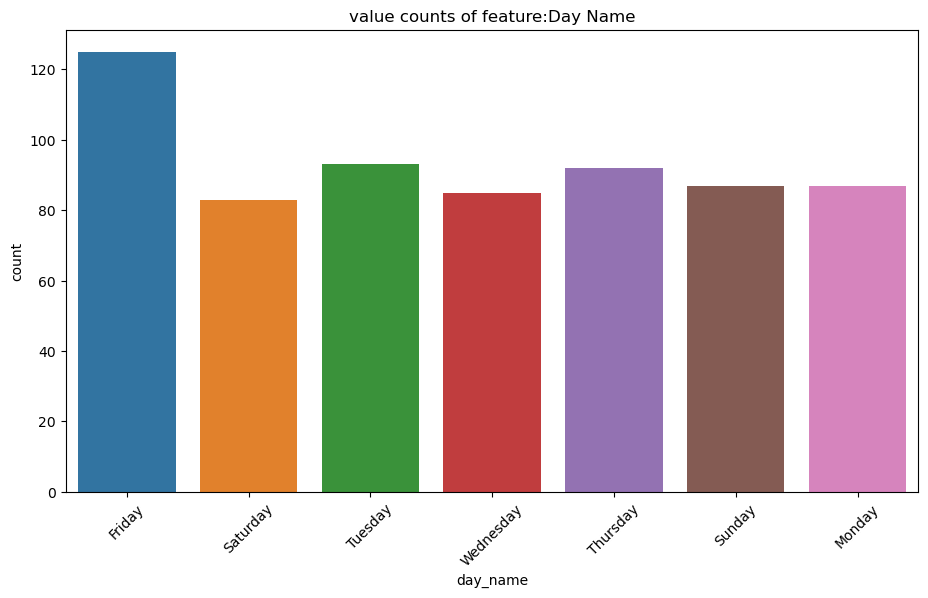

In [27]:
plt.figure(figsize=(11,6))
sns.countplot(x=uber_data["day_name"])
plt.title("value counts of feature:Day Name")
plt.xticks(rotation=45)

#it indicates that the maximum average uber rides occur on friday

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Night'),
  Text(1, 0, 'Morning'),
  Text(2, 0, 'Afternoon'),
  Text(3, 0, 'Evening')])

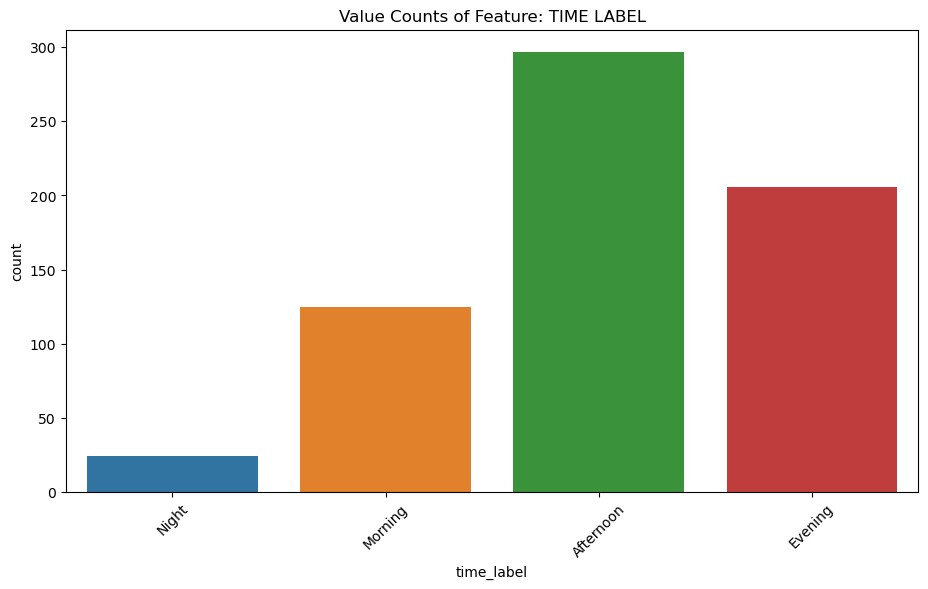

In [28]:
plt.figure(figsize=(11,6))
sns.countplot(x=uber_data["time_label"])
plt.title("Value Counts of Feature: TIME LABEL")
plt.xticks(rotation=45)

In [ ]:
#The above plot tells us that most uber rides occur in afternoon

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'October'),
  Text(9, 0, 'November'),
  Text(10, 0, 'December')])

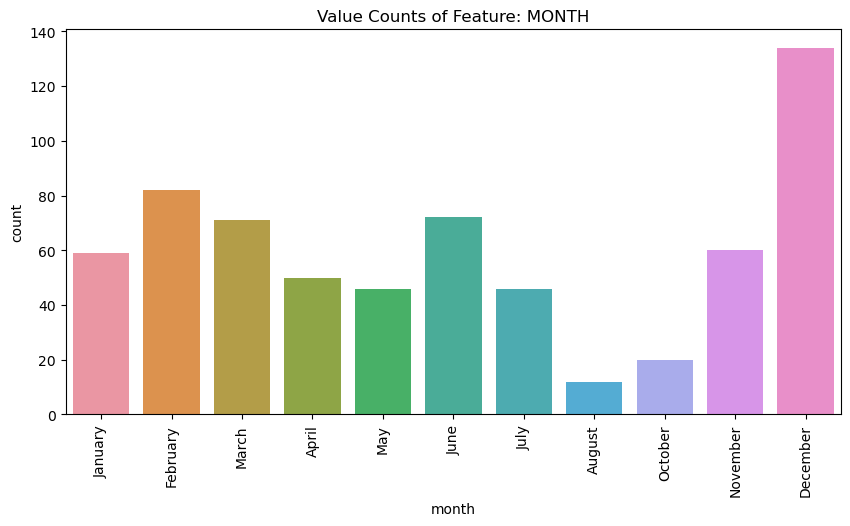

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(x=uber_data["month"])
plt.title("Value Counts of Feature: MONTH")
plt.xticks(rotation=90)

# box plot

Text(0.5, 1.0, 'Outliers in MILES over TIME')

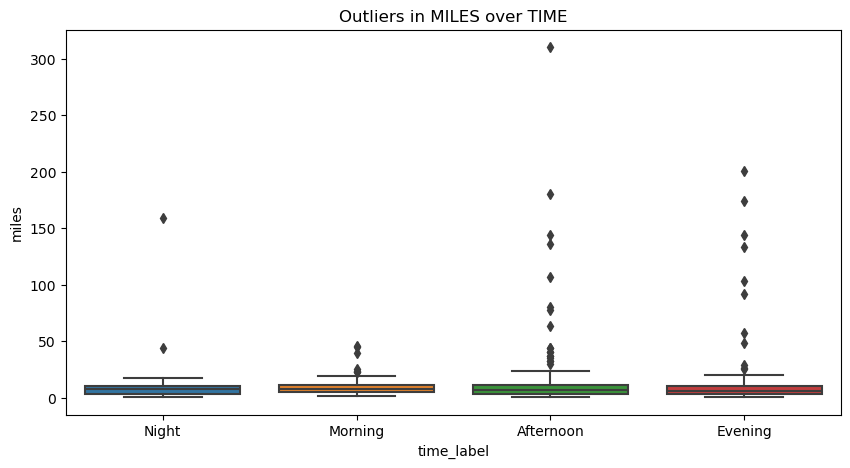

In [30]:
plt.figure(figsize=(10,5))
sns.boxplot(x=uber_data["time_label"],y=uber_data["miles"])
plt.title("Outliers in MILES over TIME")

Text(0.5, 1.0, 'Outliers in Duration')

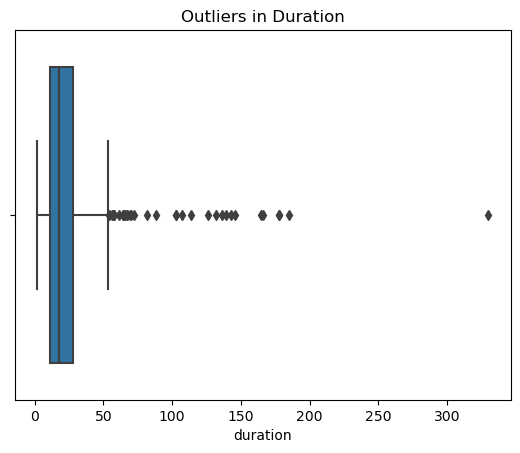

In [31]:
sns.boxplot(x=uber_data["duration"],data=uber_data)
plt.title("Outliers in Duration")

Text(0.5, 1.0, 'Outliers in Miles')

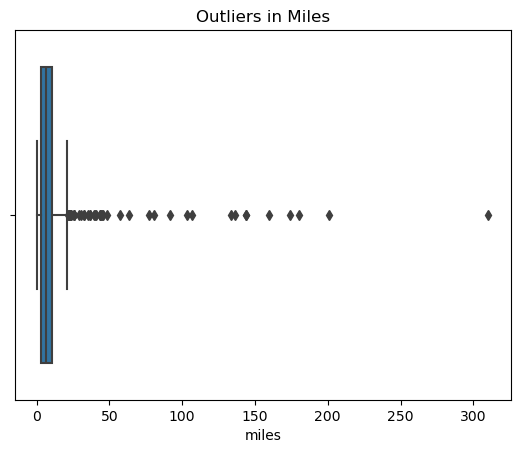

In [32]:
sns.boxplot(x=uber_data['miles'],data = uber_data)
plt.title("Outliers in Miles")

C:\Users\ayasa\AppData\Local\Temp\ipykernel_10680\36260309.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(uber_data["miles"])


Text(0.5, 1.0, 'Density PLot for Miles')

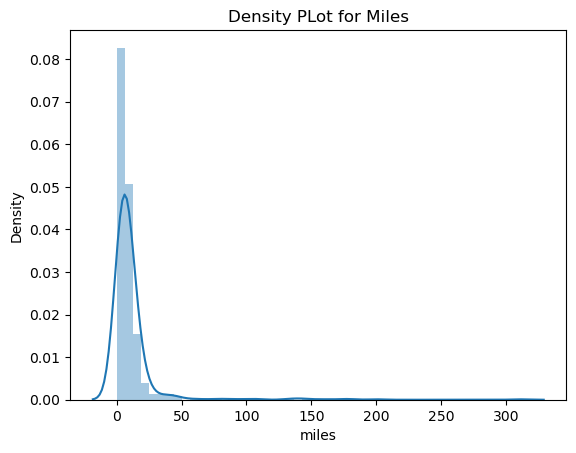

In [33]:
sns.distplot(uber_data["miles"])
plt.title("Density PLot for Miles")

C:\Users\ayasa\AppData\Local\Temp\ipykernel_10680\3918907349.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(uber_data["duration"])


Text(0.5, 1.0, 'Density PLot for Duration')

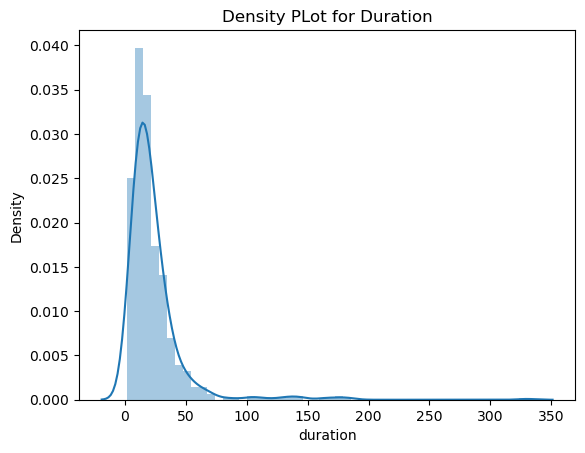

In [34]:
sns.distplot(uber_data["duration"])
plt.title("Density PLot for Duration")

C:\Users\ayasa\AppData\Local\Temp\ipykernel_10680\411136554.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(uber_data["miles"],hist = False,label="Miles")
C:\Users\ayasa\AppData\Local\Temp\ipykernel_10680\411136554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(uber_da

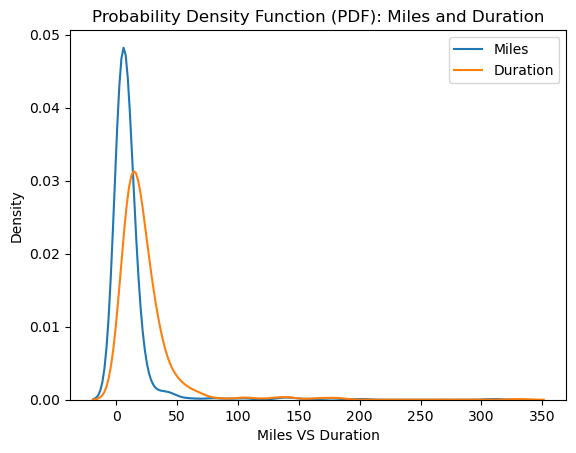

In [35]:
sns.distplot(uber_data["miles"],hist = False,label="Miles")
sns.distplot(uber_data["duration"],hist = False, label="Duration")
plt.title("Probability Density Function (PDF): Miles and Duration")
plt.xlabel("Miles VS Duration")
plt.legend()

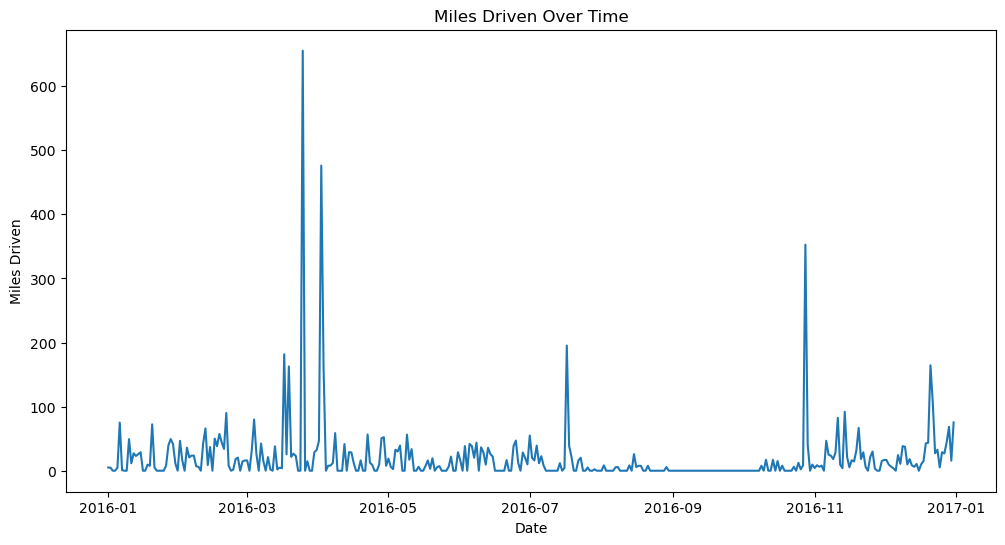

In [36]:
uber_data = uber_data[uber_data['start_date'] != "Totals"]
uber_data['start_date'] = pd.to_datetime(uber_data['start_date'])
uber_data.set_index('start_date', inplace=True)
daily_miles = uber_data.resample('D')['miles'].sum()
plt.figure(figsize=(12, 6))
plt.plot(daily_miles.index, daily_miles.values)
plt.xlabel('Date')
plt.ylabel('Miles Driven')
plt.title('Miles Driven Over Time')
plt.show()

In [37]:
Q1_miles = np.percentile(uber_data['miles'], 25)
Q3_miles = np.percentile(uber_data['miles'], 75)
IQR_miles = Q3_miles - Q1_miles

# Calculate IQR for 'duration' feature
Q1_duration = np.percentile(uber_data['duration'], 25)
Q3_duration = np.percentile(uber_data['duration'], 75)
IQR_duration = Q3_duration - Q1_duration

# Define outlier boundaries
lower_bound_miles = Q1_miles - 1.5 * IQR_miles
upper_bound_miles = Q3_miles + 1.5 * IQR_miles

lower_bound_duration = Q1_duration - 1.5 * IQR_duration
upper_bound_duration = Q3_duration + 1.5 * IQR_duration

In [38]:
# Identify and deal with outliers
uber_data['miles'] = np.where(uber_data['miles'] < lower_bound_miles, lower_bound_miles, uber_data['miles'])
uber_data['miles'] = np.where(uber_data['miles'] > upper_bound_miles, upper_bound_miles, uber_data['miles'])

uber_data['duration'] = np.where(uber_data['duration'] < lower_bound_duration, lower_bound_duration, uber_data['duration'])
uber_data['duration'] = np.where(uber_data['duration'] > upper_bound_duration, upper_bound_duration, uber_data['duration'])

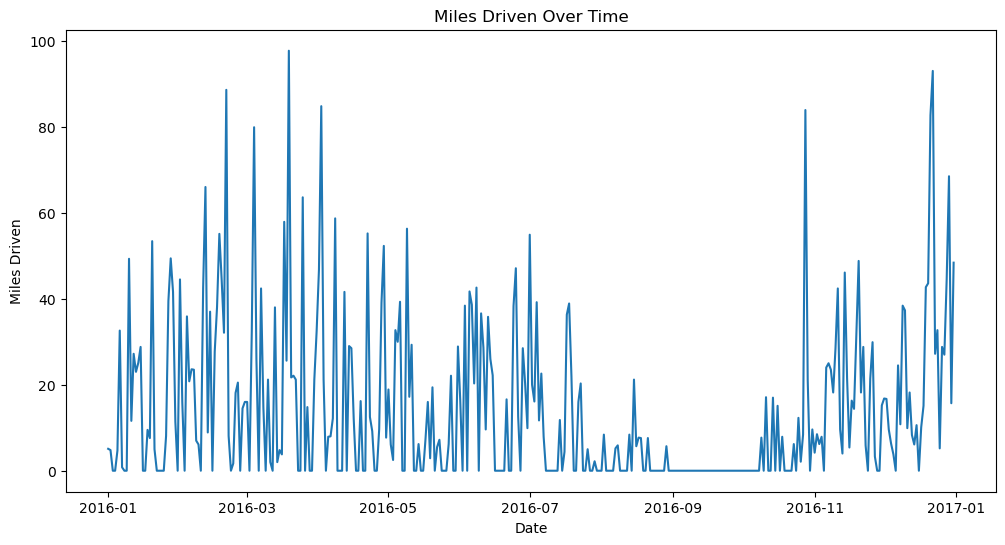

In [39]:
daily_miles = uber_data.resample('D')['miles'].sum()
plt.figure(figsize=(12, 6))
plt.plot(daily_miles.index, daily_miles.values)
plt.xlabel('Date')
plt.ylabel('Miles Driven')
plt.title('Miles Driven Over Time')
plt.show()

In [40]:
uber_data.head()

,end_date,category,start,stop,miles,purpose,day_name,time_label,month,duration
start_date,,,,,,,,,,
2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,Evening,January,6.0
2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday,Evening,January,13.0
2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday,Afternoon,January,14.0
2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,21.2,Customer Visit,Wednesday,Afternoon,January,53.5
2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,Wednesday,Afternoon,January,4.0


In [41]:
uber_data_encoded = pd.get_dummies(uber_data, columns=['category', 'start',"purpose", 'stop', 'day_name', 'time_label', 'month'])

In [42]:
uber_data_encoded.head()

,end_date,miles,duration,category_Business,category_Personal,start_Apex,start_Arabi,start_Asheville,start_Austin,start_Banner Elk,...,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October
start_date,,,,,,,,,,,,,,,,,,,,,
2016-01-01 21:11:00,2016-01-01 21:17:00,5.1,6.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2016-01-02 20:25:00,2016-01-02 20:38:00,4.8,13.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2016-01-05 17:31:00,2016-01-05 17:45:00,4.7,14.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2016-01-06 14:42:00,2016-01-06 15:49:00,21.2,53.5,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2016-01-06 17:15:00,2016-01-06 17:19:00,4.3,4.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [43]:
uber_data.columns

Index(['end_date', 'category', 'start', 'stop', 'miles', 'purpose', 'day_name',
       'time_label', 'month', 'duration'],
      dtype='object')

In [44]:
#Select features (X) and the target variable (y) for prediction.
X = uber_data_encoded.drop(['miles','end_date'], axis=1) 
y = uber_data_encoded['miles']  

In [45]:
#Splitting Data into Training and Testing Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
from sklearn.svm import SVR
model=SVR(kernel='linear').fit(X_train,y_train)

In [49]:
y_pred=model.predict(X_test)
y_pred

array([ 7.77952759,  3.33051109, 14.99013092, 16.19040378, 10.9140144 ,
        4.91716493,  3.20808781,  5.1299632 ,  4.22773393,  1.14398617,
        7.02852255, 11.70920859,  2.22919593,  3.64176133, 17.48044489,
       13.87817781,  0.42776843,  6.62895159,  2.24517621, 14.36675007,
       11.04778563,  5.37148308, 10.17343432, 10.41624194,  2.46807779,
        8.27936332,  5.92830277, 18.87668503,  3.1755394 ,  4.38489439,
       10.08577063,  7.78340548,  6.34761874,  3.32718426,  4.53147   ,
       14.24748607,  6.32969168, 18.38084488, 12.76385706,  8.05013928,
       12.32232222,  4.06012374, 13.76916594,  2.07179938,  5.17855969,
        6.6905704 ,  5.78833623,  1.29993491, 18.40423136,  9.52948551,
        2.20414575,  9.44545664,  3.73792932,  2.57566964,  3.68763463,
        3.33197046,  4.62657207,  7.78846176, 12.05751122, 10.66177032,
        5.94775122, 21.21051674,  4.28199739, 13.22126288,  6.85492388,
        5.0427446 ,  3.28834488,  8.08081231,  7.0082181 , 16.62

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor,AdaBoostRegressor

Mean Squared Error: 7.620548017583624
R-squared Score: 0.7737984394067562


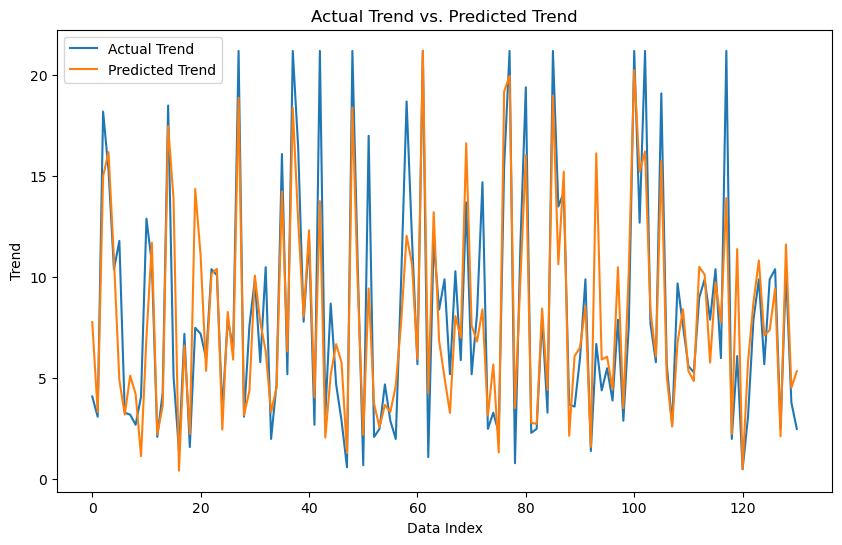

In [59]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
    
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")
    
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
plt.xlabel('Data Index')
plt.ylabel('Trend')
plt.title( 'Actual Trend vs. Predicted Trend')
plt.legend()
plt.show()
print()

In [61]:
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgb

In [62]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'ADA Boost' : AdaBoostRegressor(),
    'Linear SVR' : LinearSVR(),
    'KNN Regressor' : KNeighborsRegressor(),
    'Cat Boost Regressor' : CatBoostRegressor()
}

Results for Linear Regression:
Mean Squared Error: 8.42422734921742e+19
R-squared Score: -2.5005726212712694e+18


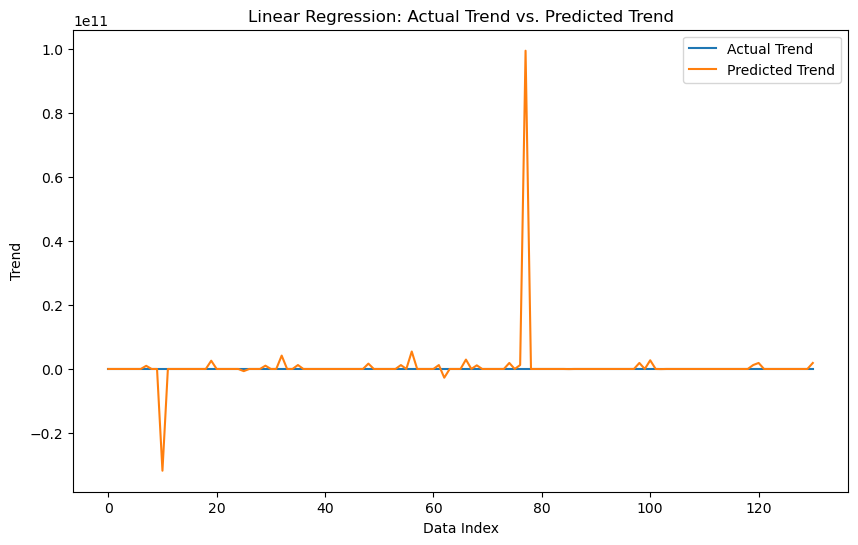


Results for Decision Tree:
Mean Squared Error: 13.1475572519084
R-squared Score: 0.609739619577423


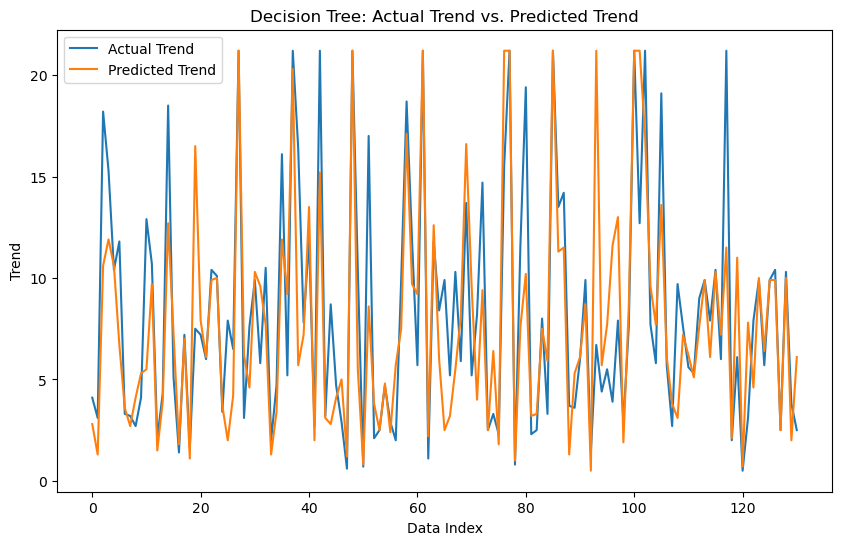


Results for Random Forest:
Mean Squared Error: 8.017910770992366
R-squared Score: 0.7620034773206585


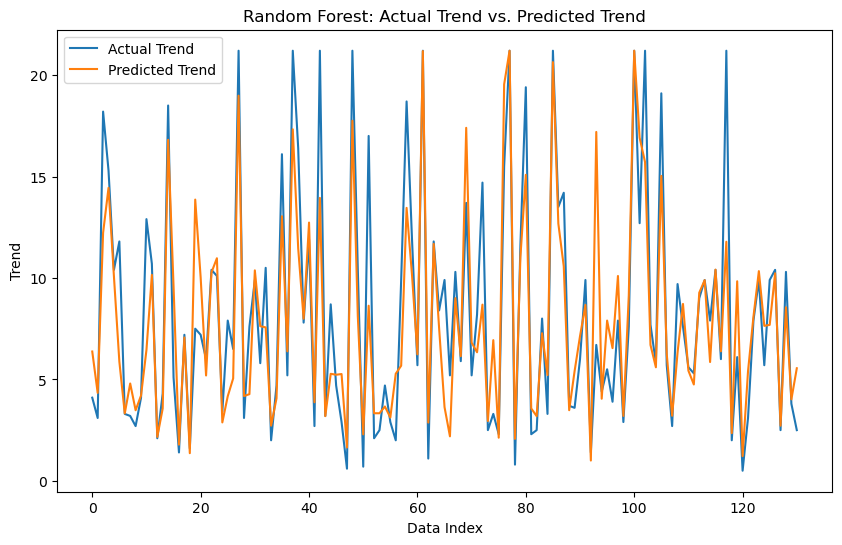


Results for SVR:
Mean Squared Error: 9.988750514684252
R-squared Score: 0.7035028255730886


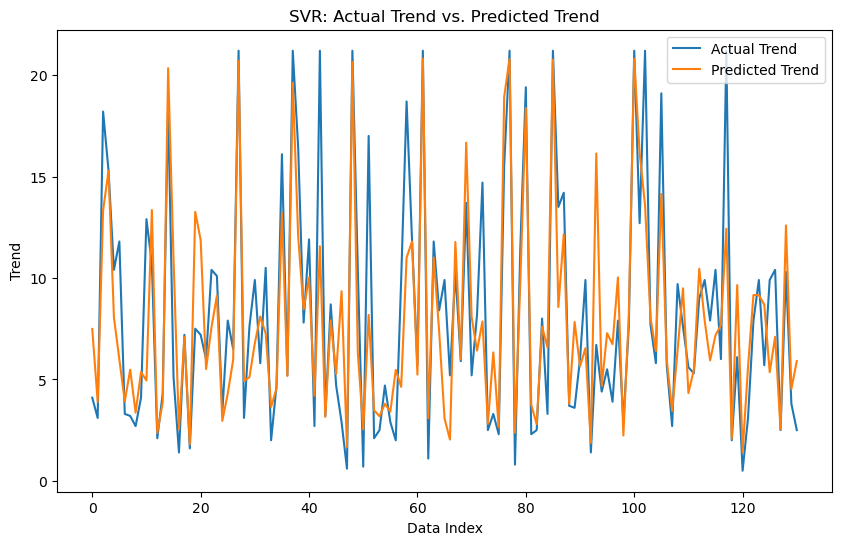


Results for XGBoost:
Mean Squared Error: 7.660667909519236
R-squared Score: 0.7726075562647922


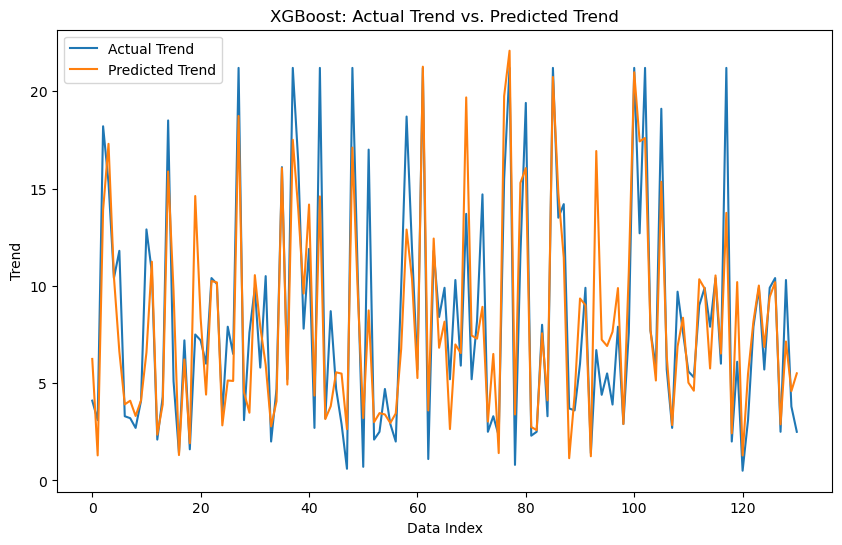


Results for LightGBM:
Mean Squared Error: 8.385206563384363
R-squared Score: 0.7511009961281383


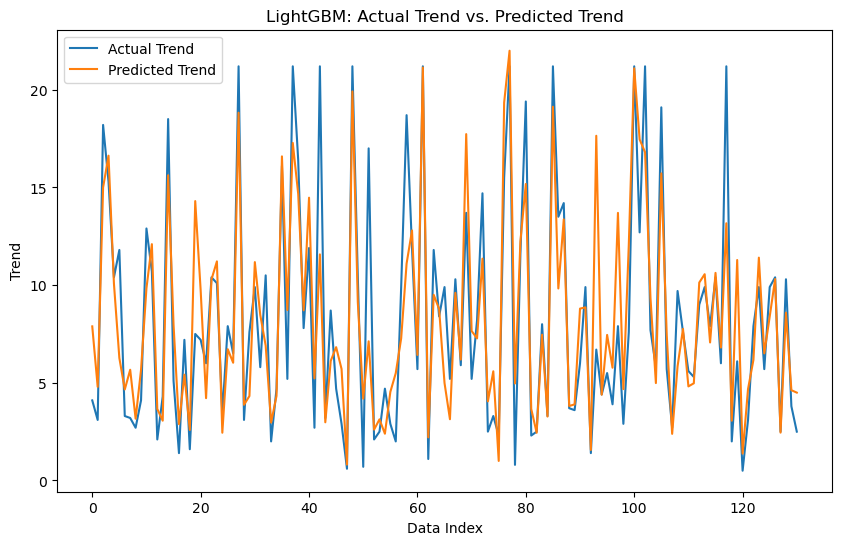


Results for Gradient Boosting Regressor:
Mean Squared Error: 7.820688776595666
R-squared Score: 0.7678576393589933


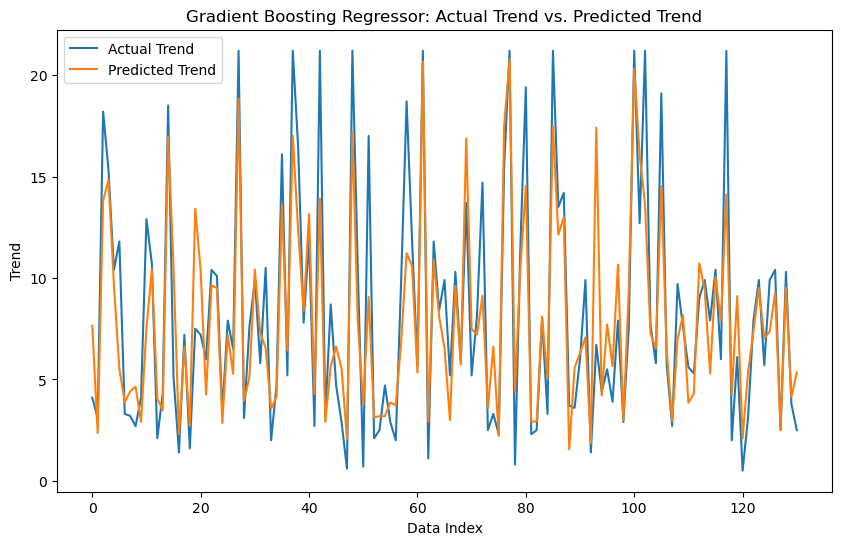


Results for ADA Boost:
Mean Squared Error: 11.016341742193603
R-squared Score: 0.6730007227350506


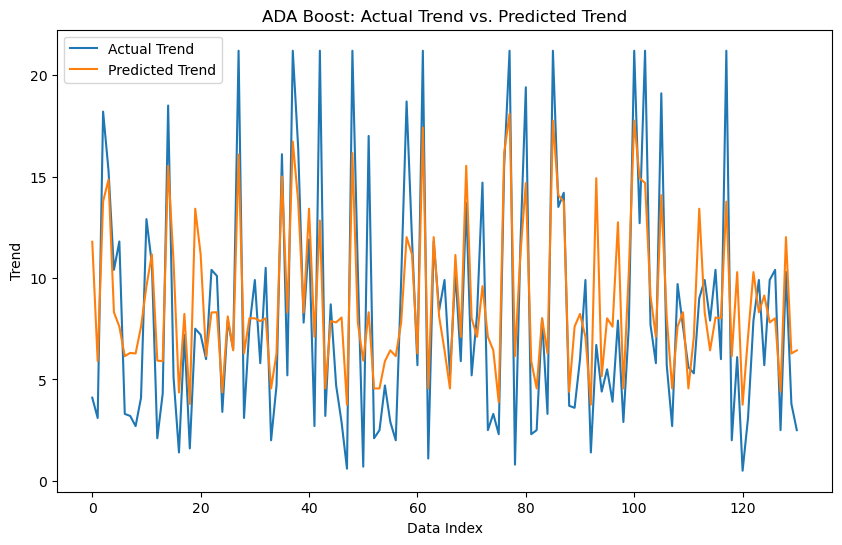


Results for Linear SVR:
Mean Squared Error: 7.929039333296672
R-squared Score: 0.7646414579294737


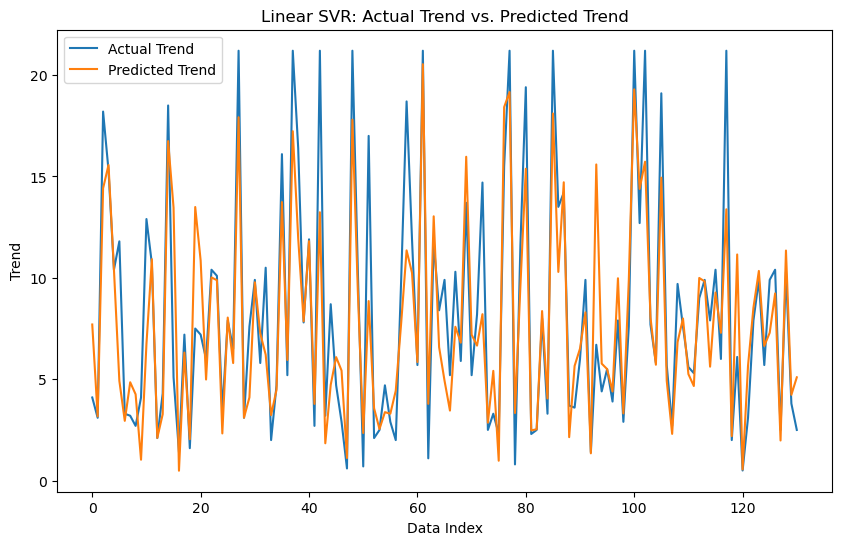

In [64]:
for name, y_pred in predictions.items():
    accuracy[name] = r2
    print(f"R-squared Score: {r2}")
    
    plt.figure(figsize=(10, 5))
    plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
    plt.xlabel('Data Index')
    plt.ylabel('Trend')
    plt.title(f'{name}: Actual Trend vs. Predicted Trend')
    plt.legend()
    plt.show()
    print()